In [1]:
import findspark
findspark.init('/usr/local/spark')
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('proj').getOrCreate()

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = spark.read.format('csv').load('Filtered_data.csv',header=True,inferSchema=True)

In [4]:
data.na.drop(how='any')

DataFrame[_c0: int, state: string, district: string, deceased_sex: string, treatment_source: string, month_of_death: int, year_of_death: int, death_symptoms: string, is_death_associated_with_preg: string, marital_status: string, highest_qualification: string, drinking_water_source: string, toilet_used: string]

In [5]:
data['death_symptoms'].count

Column<b'death_symptoms[count]'>

In [6]:
import pandas as pd

In [7]:
df= pd.read_csv("Filtered_data.csv")

In [8]:
df.head()

,Unnamed: 0,state,district,deceased_sex,treatment_source,month_of_death,year_of_death,death_symptoms,is_death_associated_with_preg,marital_status,highest_qualification,drinking_water_source,toilet_used
0,0,RAJASTHAN,JAIPUR,Female,Private Hospital,10,2011,NaN,No,Married and Gauna performed,Literate With formal education-Post Grad/ M.Te...,Piped water into dwelling/yard/plot,Flush/Pour flush latrine connected:-To piped s...
1,1,RAJASTHAN,JAIPUR,Male,Private Hospital,6,2011,NaN,NaN,Married and Gauna performed,Literate with formal education-Graduate/B.Tech...,Piped water into dwelling/yard/plot,Flush/Pour flush latrine connected:-To piped s...
2,2,RAJASTHAN,JAIPUR,Male,Government Hospital,11,2011,NaN,NaN,Married and Gauna performed,Literate With formal education-Middle,Piped water into dwelling/yard/plot,Flush/Pour flush latrine connected:-To piped s...
3,3,RAJASTHAN,JAIPUR,Female,Government Hospital,3,2011,Hypothermia,NaN,Married and Gauna performed,Literate With formal education-Secondary/Matri...,Piped water into dwelling/yard/plot,"open defecation(field, brush,jungle etc.)"
4,4,RAJASTHAN,JAIPUR,Female,No Medical attention,8,2011,NaN,NaN,Married and Gauna performed,Literate With formal education-Below primary,Public tap/standpipe,To septic tank


In [9]:
tc = df.corr()

In [10]:
tc

,Unnamed: 0,month_of_death,year_of_death
Unnamed: 0,1.000000,-0.00964,-0.126452
month_of_death,-0.009640,1.00000,-0.000240
year_of_death,-0.126452,-0.00024,1.000000


In [11]:
#df.drop(df['Unnamed: 0'],inplace=True)

In [12]:
df.head()

,Unnamed: 0,state,district,deceased_sex,treatment_source,month_of_death,year_of_death,death_symptoms,is_death_associated_with_preg,marital_status,highest_qualification,drinking_water_source,toilet_used
0,0,RAJASTHAN,JAIPUR,Female,Private Hospital,10,2011,NaN,No,Married and Gauna performed,Literate With formal education-Post Grad/ M.Te...,Piped water into dwelling/yard/plot,Flush/Pour flush latrine connected:-To piped s...
1,1,RAJASTHAN,JAIPUR,Male,Private Hospital,6,2011,NaN,NaN,Married and Gauna performed,Literate with formal education-Graduate/B.Tech...,Piped water into dwelling/yard/plot,Flush/Pour flush latrine connected:-To piped s...
2,2,RAJASTHAN,JAIPUR,Male,Government Hospital,11,2011,NaN,NaN,Married and Gauna performed,Literate With formal education-Middle,Piped water into dwelling/yard/plot,Flush/Pour flush latrine connected:-To piped s...
3,3,RAJASTHAN,JAIPUR,Female,Government Hospital,3,2011,Hypothermia,NaN,Married and Gauna performed,Literate With formal education-Secondary/Matri...,Piped water into dwelling/yard/plot,"open defecation(field, brush,jungle etc.)"
4,4,RAJASTHAN,JAIPUR,Female,No Medical attention,8,2011,NaN,NaN,Married and Gauna performed,Literate With formal education-Below primary,Public tap/standpipe,To septic tank


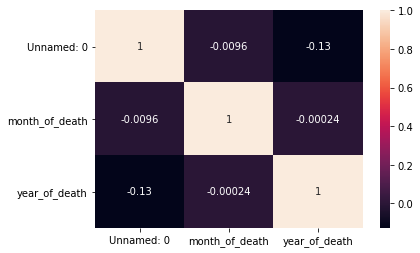

In [13]:
sns.heatmap(tc,annot=True)

In [14]:
type(tc)

pandas.core.frame.DataFrame

In [15]:
df["marital_status"].fillna("null", inplace = True)
df["highest_qualification"].fillna("null", inplace = True)
df["drinking_water_source"].fillna("null", inplace = True)
df["toilet_used"].fillna("null", inplace = True)
df["death_symptoms"].fillna("null", inplace = True)
df["is_death_associated_with_preg"].fillna("null", inplace = True)

In [16]:
state={'RAJASTHAN':1}
district = {'JAIPUR':1}
deceased_sex = {'Female':1,'Male':2}
treatment_source={'Private Hospital':1,'Government Hospital':2,
                  'No Medical attention':3,'Private Dispensary/Clinic':4,
                  'Government PHC':5,'At Home':6,'Others':7,
                  'Private AYUSH Hospital/Clinic':8,'NGO or Trust Hosp/Clinic':9,
                  'Government CHC':10,'Government UHC/UHP/UFWC':11,
                  'Government Sub Center':12,'Government Dispensary/Clinic':13}
marital_status = {'Married and Gauna performed':1, 'Widow/Widower':2, 'Never married':3, 'Separated':4, 'Married but Gauna not performed':5, 'Remarried':6,
       'Not stated':7, 'Divorced':8,'null':0}
highest_qualification={'Literate With formal education-Post Grad/ M.Tech/M.B.A/ MD/Equivalent or higher':1,'Literate with formal education-Graduate/B.Tech/B.B.A/MBBS/Equivalent':2,'Literate With formal education-Middle':3,'Literate With formal education-Secondary/Matric (Class-X)':4,'Literate With formal education-Below primary':5,'Literate Without formal education':6,'Literate With formal education-Primary':7,'null':0,'Literate With formal education-Hr. Secondary/Sr. Secondary/Pre-university (Class XII)':8,'Illiterate':9,'Literate With formal education-Non-technical/Technical diploma or certificate not equivalent to a degree':10}
drinking_water_source={'Piped water into dwelling/yard/plot':1,'Public tap/standpipe':2,'Tube well or Borehole':3, 
                       'Hand pump':4, 'Unprotected dug well':5,
       'Tanker /truck/Cart with Surface watersmall tank':6, 'Surface water':7,
       'other sources':8, 'Protected dug well':9,'null':0}
toilet_used={'Flush/Pour flush latrine connected:-To piped sewer system':1,
       'open defecation(field, brush,jungle etc.)':2, 'To septic tank':3,
       'Pit latrine with slab':4, 'To pit latrine':5, 'To somewhere else':6,
       'community toilet':7,
       'Pit latrine(without flush/ pour flush):-Ventilated Improved Pit(VIP)':8,
       'Open pit /Pit latrine without slab':9,'null':0}
death_symptoms ={'Hypothermia':1, 'Fever with Jaundice':2, 'Others':3, 'Infections':4,
       'Preterm birth/ Low birth weight baby not thriving':5,
       'Bleeding from umbilicus & elsewhere':6,
       'Convulsions soon after birth':7, 'Diarrhoea / Dysentery':8,
       'Asphyxia':9, 'Fever with rash':10, 'Birth injuries':11,
       'Respiratory Infection':12, 'Fever with convulsions':13, 'Jaundice':14,
       'Congenital/birth defects':15,'null':0}
is_death_associated_with_preg = {'No':2, 'null':0, '0':0, 'Yes':1}

In [17]:
df.state = [state[item] for item in df.state]


In [18]:
df.district = [district[item] for item in df.district]


In [19]:
df.deceased_sex = [deceased_sex[item] for item in df.deceased_sex]
df.treatment_source = [treatment_source[item] for item in df.treatment_source]
df.marital_status = [marital_status[item] for item in df.marital_status]


In [20]:
df.drinking_water_source = [drinking_water_source[item] for item in df.drinking_water_source]
df.toilet_used = [toilet_used[item] for item in df.toilet_used]
df.highest_qualification = [highest_qualification[item] for item in df.highest_qualification]
df.death_symptoms = [death_symptoms[item] for item in df.death_symptoms]
df.is_death_associated_with_preg = [is_death_associated_with_preg[item] for item in df.is_death_associated_with_preg]

In [21]:
df.head()

,Unnamed: 0,state,district,deceased_sex,treatment_source,month_of_death,year_of_death,death_symptoms,is_death_associated_with_preg,marital_status,highest_qualification,drinking_water_source,toilet_used
0,0,1,1,1,1,10,2011,0,2,1,1,1,1
1,1,1,1,2,1,6,2011,0,0,1,2,1,1
2,2,1,1,2,2,11,2011,0,0,1,3,1,1
3,3,1,1,1,2,3,2011,1,0,1,4,1,2
4,4,1,1,1,3,8,2011,0,0,1,5,2,3


In [22]:
#sns.set(style="whitegrid")
#sns.barplot(x='deceased_sex',y='year_of_death',data=df)

In [23]:
#t = df['marital_status']
#t1=df['year_of_death'] 

In [24]:
#type(t)

In [25]:
#colors = ["#1f77b4", "#ff7f0e"]
#plt.pie(t,colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)

#plt.show()

In [26]:
#t.plot.pie(figsize=(6, 6))


In [27]:
#import cufflinks as cf
#f.set_config_file(world_readable=True,offline=False)

In [28]:
df.to_csv('data.csv')

In [29]:
data = spark.read.format('csv').load('data.csv',inferSchema=True,header=True)

In [30]:

data.head(5)

[Row(_c0=0, Unnamed: 0=0, state=1, district=1, deceased_sex=1, treatment_source=1, month_of_death=10, year_of_death=2011, death_symptoms=0, is_death_associated_with_preg=2, marital_status=1, highest_qualification=1, drinking_water_source=1, toilet_used=1),
 Row(_c0=1, Unnamed: 0=1, state=1, district=1, deceased_sex=2, treatment_source=1, month_of_death=6, year_of_death=2011, death_symptoms=0, is_death_associated_with_preg=0, marital_status=1, highest_qualification=2, drinking_water_source=1, toilet_used=1),
 Row(_c0=2, Unnamed: 0=2, state=1, district=1, deceased_sex=2, treatment_source=2, month_of_death=11, year_of_death=2011, death_symptoms=0, is_death_associated_with_preg=0, marital_status=1, highest_qualification=3, drinking_water_source=1, toilet_used=1),
 Row(_c0=3, Unnamed: 0=3, state=1, district=1, deceased_sex=1, treatment_source=2, month_of_death=3, year_of_death=2011, death_symptoms=1, is_death_associated_with_preg=0, marital_status=1, highest_qualification=4, drinking_water_

In [31]:
featureColumns = ['state',
 'district',
 'deceased_sex',
 'treatment_source',
 'month_of_death',
 'death_symptoms',
 'is_death_associated_with_preg',
 'marital_status',
 'highest_qualification',
 'drinking_water_source']


In [32]:
type(data)

pyspark.sql.dataframe.DataFrame

In [33]:
train_data,test_data =data.randomSplit([0.7,0.3])

In [34]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import VectorIndexer,VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [47]:
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml import Pipeline

In [36]:
assembler = VectorAssembler(inputCols=featureColumns,outputCol="features")

In [37]:
assembled = assembler.transform(data)

In [38]:
assembled.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Unnamed: 0: integer (nullable = true)
 |-- state: integer (nullable = true)
 |-- district: integer (nullable = true)
 |-- deceased_sex: integer (nullable = true)
 |-- treatment_source: integer (nullable = true)
 |-- month_of_death: integer (nullable = true)
 |-- year_of_death: integer (nullable = true)
 |-- death_symptoms: integer (nullable = true)
 |-- is_death_associated_with_preg: integer (nullable = true)
 |-- marital_status: integer (nullable = true)
 |-- highest_qualification: integer (nullable = true)
 |-- drinking_water_source: integer (nullable = true)
 |-- toilet_used: integer (nullable = true)
 |-- features: vector (nullable = true)



In [39]:
assembled.head()

Row(_c0=0, Unnamed: 0=0, state=1, district=1, deceased_sex=1, treatment_source=1, month_of_death=10, year_of_death=2011, death_symptoms=0, is_death_associated_with_preg=2, marital_status=1, highest_qualification=1, drinking_water_source=1, toilet_used=1, features=DenseVector([1.0, 1.0, 1.0, 1.0, 10.0, 0.0, 2.0, 1.0, 1.0, 1.0]))

In [40]:
(trainingData,testData) = assembled.randomSplit([0.8,0.2],seed = 13234)

In [54]:
trainingData.count(),testData.count()

(1474, 396)

In [55]:
trainingData.columns

['_c0',
 'Unnamed: 0',
 'state',
 'district',
 'deceased_sex',
 'treatment_source',
 'month_of_death',
 'year_of_death',
 'death_symptoms',
 'is_death_associated_with_preg',
 'marital_status',
 'highest_qualification',
 'drinking_water_source',
 'toilet_used',
 'features']

In [42]:
dt = DecisionTreeClassifier(labelCol="",featuresCol="features",maxDepth=5,minInstancesPerNode=20,impurity="gini")

In [52]:
dt = DecisionTreeRegressor(labelCol="year_of_death",featuresCol="features",maxDepth=5,minInstancesPerNode=20)

In [56]:
pipeline = Pipeline(stages=[dt])
model = pipeline.fit(trainingData)

In [57]:
predictions = model.transform(testData)

In [62]:
predictions.select("year_of_death","prediction").head(25)

[Row(year_of_death=2011, prediction=2008.8796068796069),
 Row(year_of_death=2007, prediction=2008.8796068796069),
 Row(year_of_death=2009, prediction=2008.8796068796069),
 Row(year_of_death=2009, prediction=2008.5652173913043),
 Row(year_of_death=2008, prediction=2009.249027237354),
 Row(year_of_death=2008, prediction=2008.5652173913043),
 Row(year_of_death=2009, prediction=2008.5652173913043),
 Row(year_of_death=2009, prediction=2008.8796068796069),
 Row(year_of_death=2009, prediction=2008.5652173913043),
 Row(year_of_death=2009, prediction=2008.8796068796069),
 Row(year_of_death=2009, prediction=2008.8796068796069),
 Row(year_of_death=2007, prediction=2008.5652173913043),
 Row(year_of_death=2009, prediction=2008.8796068796069),
 Row(year_of_death=2007, prediction=2008.8796068796069),
 Row(year_of_death=2009, prediction=2008.5652173913043),
 Row(year_of_death=2008, prediction=2008.5652173913043),
 Row(year_of_death=2009, prediction=2008.8796068796069),
 Row(year_of_death=2008, predict